<img src='logo.png'><br>
* ref : <a href='https://www.kaggle.com/mlg-ulb/creditcardfraud'>https://www.kaggle.com/mlg-ulb/creditcardfraud</a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, f1_score, precision_score , recall_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score
from sklearn.preprocessing import Binarizer

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler 
import warnings
warnings.filterwarnings(action='ignore')

sns.set()

In [30]:
def my_eval(y_val, pred, proba, th):  #avg='binary'
        accuracy = accuracy_score(y_val, pred)
        precision = precision_score(y_val, pred)
        recall = recall_score(y_val, pred)
        f1 = f1_score(y_val, pred)
        matrix = confusion_matrix(y_val, pred)
        print(f'정확도{accuracy:.4f} 정밀도:{precision:.4f} 재현률:{recall:.4f} f1:{f1:.4f}')
        print("오차행렬\n", matrix)
        # cls_report = classification_report(y_val, pred)

        # --------------- 양성 평가를 위한 차트 : precision_recall_curv() -------------------    
        # plot_precision_recall_curve(model, 문제지2, 정답지2)
        precisions, recalls, ths = precision_recall_curve(y_val, proba[:, 1])
        plt.title("precision recall curv %0.2f %0.4f"%(th,f1))
        # plt.title(f"precision recall curv %0.4f" % f1)
        plt.xlabel("threadhold")
        plt.ylabel("value")
        plt.plot(ths, precisions[:ths.shape[0]], "b", label="precision")
        plt.plot(ths, recalls[:ths.shape[0]], "r", linestyle='--', label="recall")
        plt.grid()
        plt.legend()
        plt.show()
        
        
        # --------------- 양성 평가를 위한 차트 : roc_auc_score(), roc_curve() -------------------
        auc_score = roc_auc_score(y_val, proba[:, 1])

        fprs, tprs, ths = roc_curve(y_val, proba[:, 1])
        plt.title("roc curv %0.4f" % auc_score)
        # plt.title(f"precision recall curv %0.4f" % f1)
        plt.xlabel("FPR(1-specificity)")
        plt.ylabel("TPR")
        plt.grid()
        plt.plot(fprs, tprs, "b")
        plt.plot([0, 1], [0, 1], '--', color='black')
        plt.show()


def split_fit_score(X, y, model=None, test_size=0.2, th_list=None):

        X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size,random_state=1414,stratify=y) #shuffle=False, 

        model.fit(X_train, y_train)
        pred = model.predict(X_test)                                        #[0  1]              th:0.5
        proba = model.predict_proba(X_test)                                 #[[.7 >.3] [.4  <.6]]  --> [0  1]
        
        # ------------------ proba : 양성 점수 측정을 위한 예측 확률값 ---------------
        # proba 리턴값 : ndarray of shape (n_samples, n_classes)  150*3
        # [
        #     [0.4 0.6]  --> 1
        #     [0.7 0.3]  --> 0
        #     [0.42 0.58] -> 1
        # ]
        
        if th_list == None:
            #------------------방법1 ) 임계치 0.5(기본값)으로 점수 출력 ---------------
            binz = Binarizer(threshold=0.5)                              # th:0.5
            pred_binz = binz.fit_transform(proba[:, 1].reshape(-1,1))    # [[.7 >.3] [.4  <.6]]  --> [0  1]
            my_eval(y_test, pred_binz, proba, 0.5)                        # 점수def호출
 
        else:
            # ----------------방법2) 임계치 조정해가면서 최적의 점수 찾기---------------
            # (24 양성인데 틀리게예측) --> 임계치 낮춘다 == 양성학습데이터늘린다  == 양성점수를 올린다 
            th_list = [0, 0.35 , 0.38, 0.42, 0.45, 0.5, 1]
            for th in th_list:
                    binz = Binarizer(threshold=th)                              # [[.7 .3] [.4  .6]]   th:0.2
                    pred_binz = binz.fit_transform(proba[:, 1].reshape(-1,1))   # [  th<.3] [  th<.6]]  --> [1 1]
                    print(th)
                    my_eval(y_test, pred_binz, proba, th)                       #점수def호출

## 데이터 로드 

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## target 피쳐 확인

불균형 분류 : 0.9983, 0.0017
0    284315
1       492
Name: Class, dtype: int64


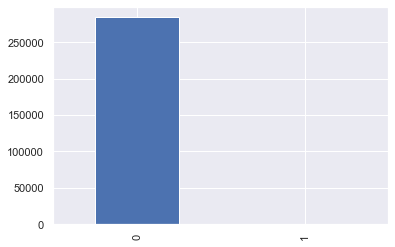

In [8]:
print( '불균형 분류 : {:.4f}, {:.4f}'.format(df[df['Class']==0].shape[0]/df.shape[0], df[df['Class']==1].shape[0] / df.shape[0] ) )
print(df['Class'].value_counts())

df['Class'].value_counts().plot(kind='bar')
plt.show()

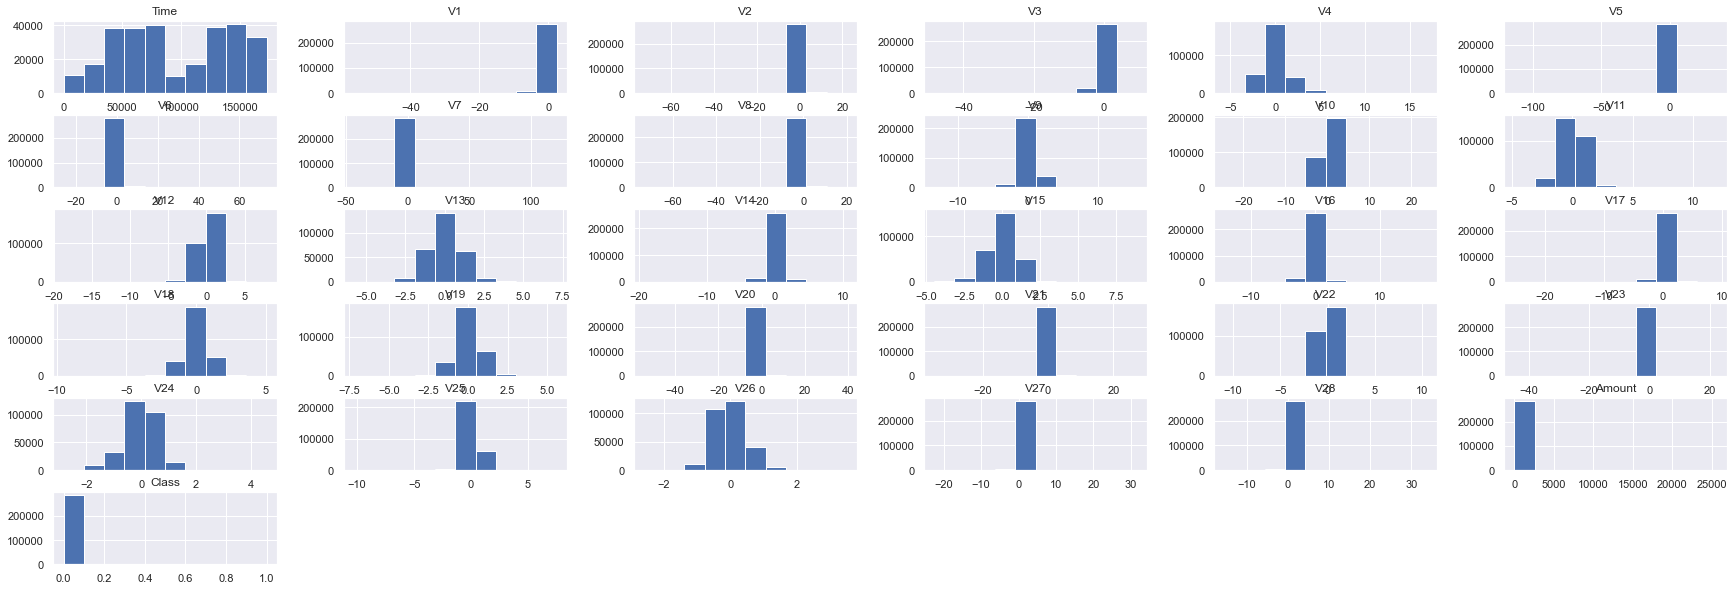

In [9]:
df.hist(figsize=(30,10))
plt.show()

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## EDA

#### Time : datetime 연습

In [11]:
str_date = '2021-08-07 12:23:24'
todate = pd.to_datetime(str_date)
print(type(todate))


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# from datetime import datetime as dtime
# str_date = '2021-08-07 12:23:24'
# df['TT'] = pd.to_datetime(str_date)
# #----------------------------------------TODO
# # train['datetime'] = pd.to_datetime(train['datetime'], format = '%Y-%m-%dT%H:%M:%S')
# # train['year'] = train['datetime'].dt.year
# df['TT2'] = df['TT'].dtime.year

In [14]:
df['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [15]:
print(172792/60/60/24)

1.9999074074074075


In [16]:
pdf = df[df['Class']==1]
ndf = df[df['Class']==0]

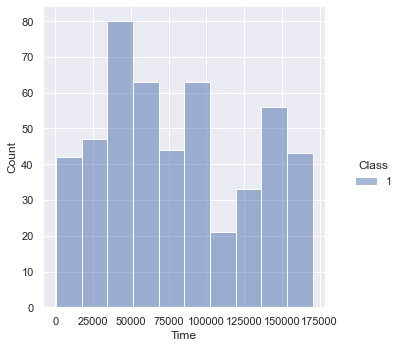

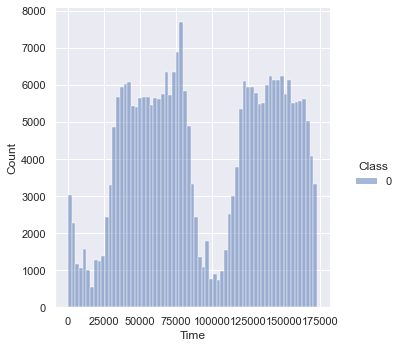

In [19]:
# fig, axes = plt.subplots(1,2, figsize=(10,4))
sns.displot(data=pdf, x='Time', hue='Class',kind="hist") #, ax=axes[0])
sns.displot(data=ndf, x='Time', hue='Class',kind="hist") #, ax=axes[1])

# fig, axes = plt.subplots(figsize=(10,5))
# sns.distplot(ndf['Time'], label="0" )
# sns.distplot(pdf['Time'], label="1" )
# axes.legend()
plt.show()


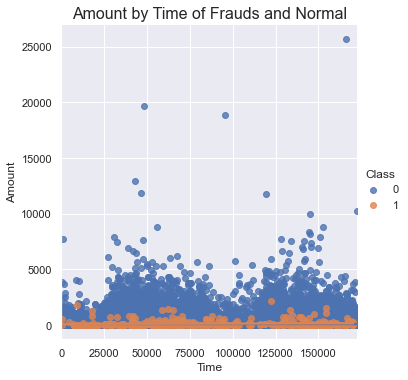

In [20]:
ax = sns.lmplot(y="Amount", x="Time", data=df, hue='Class')
# sns.scatterplot(data=df, x="Time", y="Amount", hue="Class")
plt.title("Amount by Time of Frauds and Normal", fontsize=16)
plt.show()

In [21]:
df.drop(['Time'], axis=1, inplace=True)

In [22]:
# df.info()

#### Amount

In [23]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

## 모델 선정 

In [38]:
df = pd.read_csv("sample5.csv")

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', dual=False,C=1.0,random_state=1414,
                           max_iter=100, multi_class='auto')

##  1차 점수 확인

In [40]:
df.drop(['Time'], axis=1,  inplace=True)

In [41]:
y = df['Class']
X = df.drop(['Class'], axis=1)    

In [42]:
y.value_counts()

0    56863
1       99
Name: Class, dtype: int64

정확도0.9983 정밀도:0.5238 재현률:0.5500 f1:0.5366
오차행렬
 [[11363    10]
 [    9    11]]


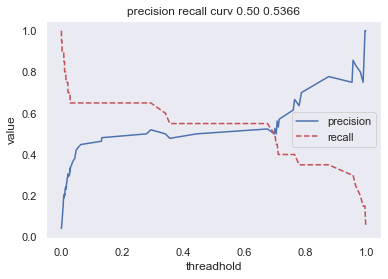

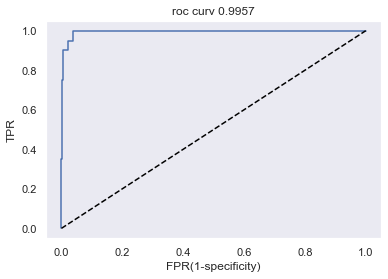

In [ ]:
split_fit_score(X, y, model=lr)

## 2차 점수 : 스케일링

In [65]:
df = pd.read_csv("sample5.csv")
df = pd.read_csv("./creditcard.csv")

df.drop(['Time'], axis=1,  inplace=True)

In [66]:
y = df['Class']
X = df.drop(['Class'], axis=1)

In [67]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [68]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=1414)
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
for sc in scalers:
    sc.fit(X_train['Amount'].values.reshape(-1,1))
    train_sc_arr = sc.transform(X_train['Amount'].values.reshape(-1,1))   #[2 2 2 2 2 2 2 2 2 2 2...]
    test_sc_arr = sc.transform(X_test['Amount'].values.reshape(-1,1))
    X_train['Amount_'+ sc.__class__.__name__[:3]] = train_sc_arr #.reshape(-1,1)
    X_test ['Amount_'+ sc.__class__.__name__[:3]] = test_sc_arr #.reshape(-1,1)    

In [69]:
X_train = X_train.append(X_test)
print(X_train.shape, y.shape)

(284807, 32) (284807,)


정확도0.9983 정밀도:0.0000 재현률:0.0000 f1:0.0000
오차행렬
 [[56864     0]
 [   98     0]]


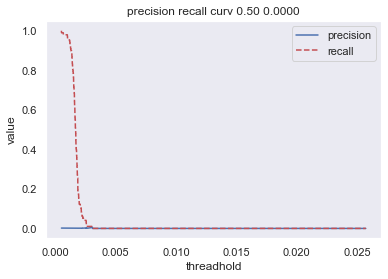

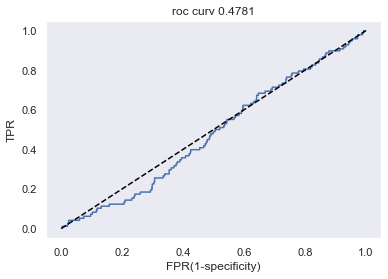

정확도0.9983 정밀도:0.0000 재현률:0.0000 f1:0.0000
오차행렬
 [[56864     0]
 [   98     0]]


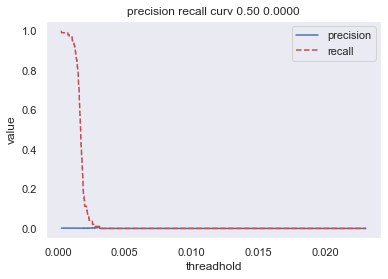

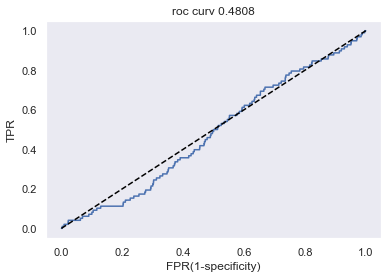

정확도0.9983 정밀도:0.0000 재현률:0.0000 f1:0.0000
오차행렬
 [[56864     0]
 [   98     0]]


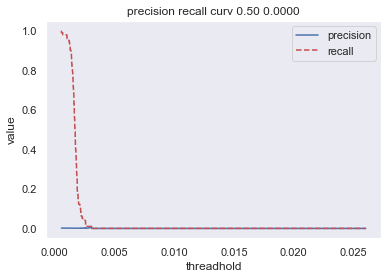

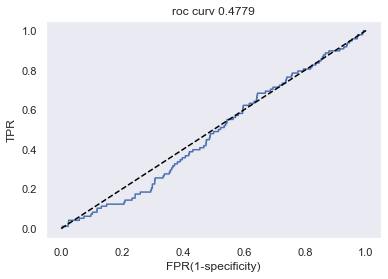

In [70]:
X_train_std = X_train.drop(['Amount','Amount_Min','Amount_Rob'], axis=1)
split_fit_score(X_train_std, y, model=lr)


X_train_min = X_train.drop(['Amount','Amount_Sta','Amount_Rob'], axis=1)
split_fit_score(X_train_min, y, model=lr)


X_train_rob = X_train.drop(['Amount','Amount_Sta','Amount_Min'], axis=1)
split_fit_score(X_train_rob, y, model=lr)

## 상관분석

Class 피쳐와 (+) 상관관계 TOP-n Index(['Class', 'V11', 'V4', 'V2', 'V21'], dtype='object')
Class 피쳐와 (-) 상관관계 TOP-n Index(['V17', 'V14', 'V12', 'V10', 'V16'], dtype='object')


<AxesSubplot:>

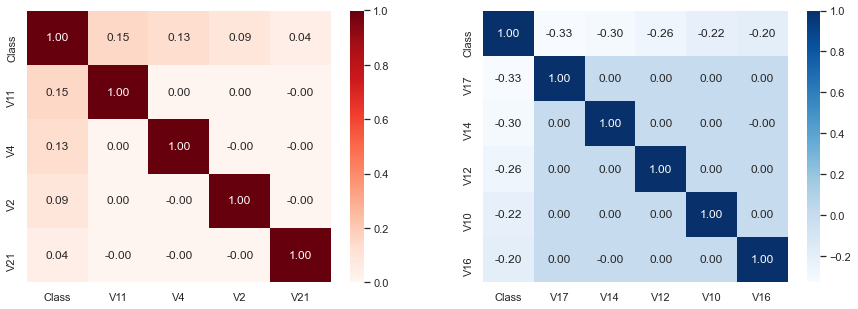

In [71]:
#### Class에 영향을 주는 상위 n개 피쳐에 대해서만 상관 분석
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

top_corr_large  = df.corr().nlargest(5, 'Class').index
print("Class 피쳐와 (+) 상관관계 TOP-n", top_corr_large)
sns.heatmap(df[top_corr_large].corr(), annot=True, cmap='Reds', fmt='0.2f' , ax=ax1)

top_corr_small = df.corr().nsmallest(5, 'Class').index
print("Class 피쳐와 (-) 상관관계 TOP-n", top_corr_small)
sns.heatmap(df[['Class','V17', 'V14', 'V12', 'V10', 'V16']].corr(), annot=True, cmap='Blues', fmt='0.2f' , ax=ax2)
# plt.show()

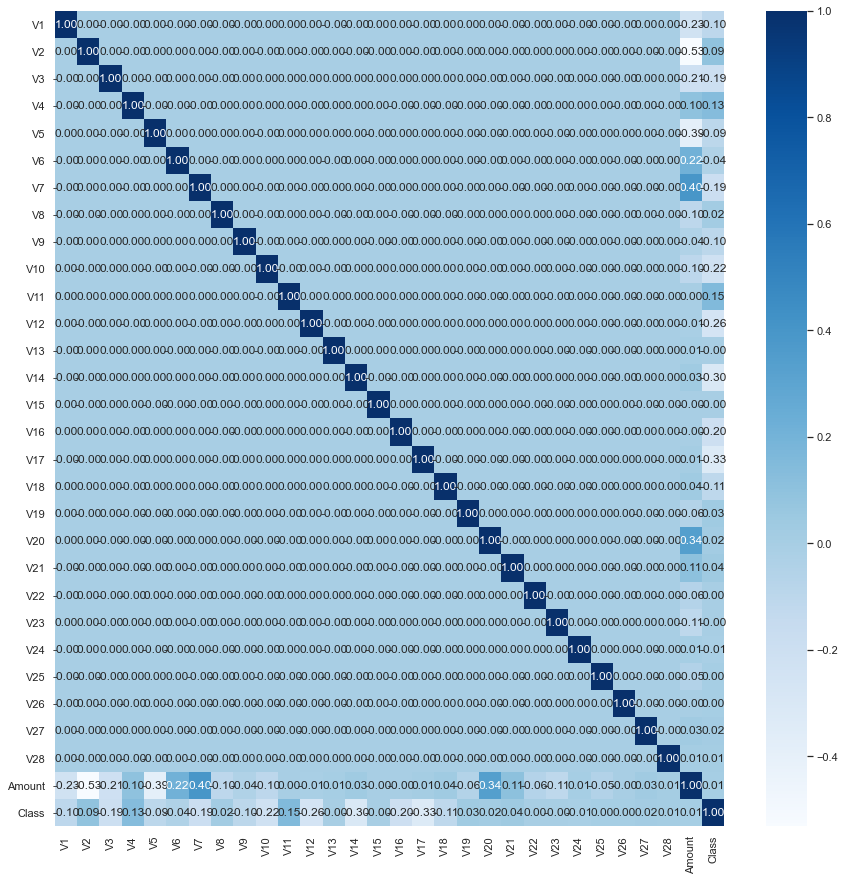

In [72]:
fig, ax = plt.subplots(figsize=(15,15))     
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

### (+) 'V11', 'V4',

### (-) 'V17', 'V14', 'V12'

In [73]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Amount_Sta,Amount_Min,Amount_Rob
222911,2.189281,-0.727144,-1.453394,-1.071583,-0.333891,-0.876030,-0.355614,-0.302825,-0.863469,1.026021,...,-0.091372,-0.326797,0.243627,0.069989,-0.041225,-0.076403,25.0,-0.250807,0.000973,0.042040
79403,1.446506,-1.638916,-0.251910,-2.446979,0.231901,3.797146,-2.263127,1.008092,-1.375874,1.432151,...,-0.069035,1.008085,0.353073,-0.029895,0.079725,0.037894,49.0,-0.155522,0.001907,0.378363
21176,-0.446417,0.705363,2.221047,0.084171,-1.003429,-0.719927,0.364966,-0.054150,-0.046766,-0.459083,...,0.018878,0.948621,-0.361123,0.306006,-0.096743,0.023970,52.9,-0.140038,0.002059,0.433016
162388,1.422630,-1.363805,-1.774599,-0.006407,-0.516673,-1.244683,0.585331,-0.481490,0.483244,-0.079929,...,-0.237024,0.041753,-0.217947,1.376809,-0.202144,-0.019626,360.0,1.079217,0.014013,4.736547
161292,2.226294,-1.422619,-1.524832,-1.826468,-0.687142,-0.253781,-0.878657,-0.071902,-1.668987,1.771217,...,0.323466,0.138303,-0.330539,-0.447321,-0.027790,-0.053851,58.0,-0.119790,0.002258,0.504484


## 모델 선정 & 학습 & 평가

정확도0.9994 정밀도:0.9706 재현률:0.6735 f1:0.7952
오차행렬
 [[56862     2]
 [   32    66]]


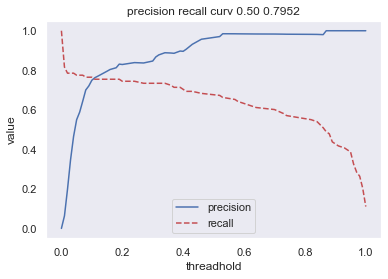

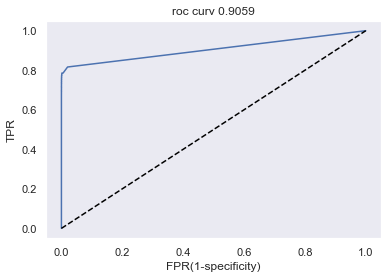

In [74]:
y = df['Class']
X = df.drop('Class', axis=1)
model = RandomForestClassifier(n_estimators=100,random_state=1414) 
split_fit_score(X, y, model=model)